### Special Example 2 - Functional Corr-Test

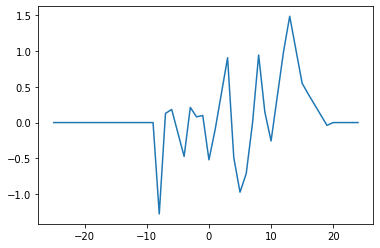

In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from statsmed import statsmed

# Casadi definition of variable x
x = ca.SX.sym('x')

# Define first group of functions f_list1 by using random data. 
f_list1 = []
for i in range(50):
    f_list1 += [statsmed.punkt_def_function(x,np.sort(np.random.randn(20)*10),np.random.randn(20))]

# Define second group of functions f_list1 by using random data.
f_list2 = []
for i in range(50):
    f_list2 += [statsmed.punkt_def_function(x,np.sort(np.random.randn(20)*10),np.random.randn(20)+1)]

# Define sampler of the functions to plot them.
sampler = np.arange(0,50)-(50/2)

# Evaluate first function from function list one using the sampler
f_example_eval = ca.Function('f_example_eval', [x], [f_list1[0]])

# Plot first function from function list one using the sampler
plt.plot(sampler,f_example_eval(sampler))



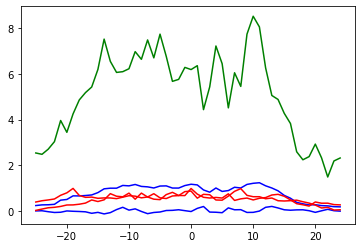

In [2]:
mean_f1 = statsmed.mean_function(f_list1)
var_f1 = statsmed.var_function(f_list1)

mean_f2 = statsmed.mean_function(f_list2)
var_f2 = statsmed.var_function(f_list2)

Tfun_f = statsmed.Tfun(f_list1,f_list2)

fm_eval1 = ca.Function('f_eval1', [x], [mean_f1])
plt.plot(sampler,fm_eval1(sampler),'b')
fm_eval2 = ca.Function('f_eval2', [x], [mean_f2])
plt.plot(sampler,fm_eval2(sampler),'b')

fv_eval1 = ca.Function('f_eval1', [x], [var_f1])
plt.plot(sampler,fv_eval1(sampler),'r')
fv_eval2 = ca.Function('f_eval2', [x], [var_f2])
plt.plot(sampler,fv_eval2(sampler),'r')

Tf_eval = ca.Function('f_eval1', [x], [Tfun_f])
plt.plot(sampler,Tf_eval(sampler),'g')



In [3]:
print(statsmed.functional_corr_test_stat(x,f_list1,f_list2,sampler))

[-22.65128440663257, 'p < 0.001']


In [18]:
print(statsmed.functional_corr_test(x,f_list1,f_list2,sampler,100))

[-18.059000022828382, 'p = 0.99']


In [22]:
print(statsmed.functional_corr_test_all_perm(x,f_list1[:4],f_list2[:4],sampler))

[0.8998861258404399, 'p = 0.3']
